In [17]:
%matplotlib inline
from numpy.random import *
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
import pandas as pd
import math
import pickle
import time
import datetime
import json
import itertools

In [2]:
with open("./2017-10-17ticker_log.json") as data_file:
    data_json = json.load(data_file)
    ticker_log = collections.OrderedDict(sorted(data_json.items()))

In [54]:
def plot_two_spreads(ex_1, ex_2):
    spread_a_list = []
    spread_b_list = []

    for key, ticker in ticker_log.items():
        spread_a = ticker[ex_1]["bid"] - ticker[ex_2]["ask"]
        spread_b = ticker[ex_2]["bid"] - ticker[ex_1]["ask"]
        spread_a_list.append(spread_a)
        spread_b_list.append(spread_b)

    df_spread=pd.DataFrame(index=list(ticker_log.keys()))
    df_spread[ex_1+"_bid-"+ex_2+"_ask"] = pd.DataFrame(spread_a_list, index=list(ticker_log.keys()))
    df_spread[ex_2+"_bid-"+ex_1+"_ask"] = pd.DataFrame(spread_b_list, index=list(ticker_log.keys()))

    plt.figure()
    ax = df_spread[ex_1+"_bid-"+ex_2+"_ask"].plot.hist(bins=100, range=(-5000, 5000), alpha=0.6,legend=True)
    ax = df_spread[ex_2+"_bid-"+ex_1+"_ask"].plot.hist(bins=100, range=(-5000, 5000), alpha=0.6,legend=True)

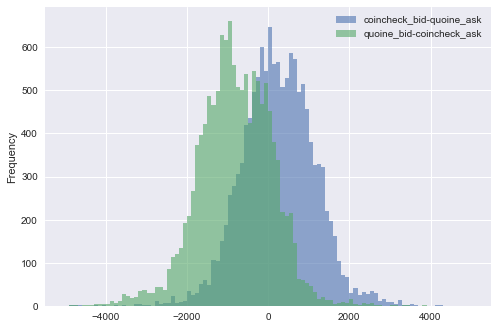

In [55]:
plot_two_spreads("coincheck","quoine")

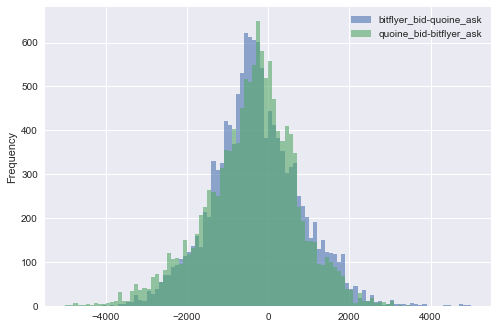

In [56]:
plot_two_spreads("bitflyer","quoine")